MNIST dataset
each pixel one row create a grey scal image 28 * 28 =  784 columns
SOURCE : https://www.kaggle.com/code/maharshipandya/mnist-using-knn-97#Section-1---Reading-the-data

In [5]:
from matplotlib.ticker import MultipleLocator
from sklearnex import patch_sklearn
patch_sklearn()
import numpy as np
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from IPython.display import display
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
%matplotlib inline 


plt.rcParams['figure.dpi'] = 200
plt.style.use(['science','ieee','bright'])

def plot_feature_importance_comparison(models, X_test, y_test, colors=None,coefs = None):
    # Dictionary to store feature importance results
    fi_results = {}

    for model_name, model in models.items():
        fi = permutation_importance(model, X_test, y_test,n_jobs=-1, random_state=42)
        fi_results[model_name] = fi.importances_mean

    # Extract feature names
    feature_names = range(X_test.shape[1])

    # Create a DataFrame for feature importance results
    importance_df = pd.DataFrame(fi_results, index=feature_names)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 4))
        plt.gca().xaxis.set_major_locator(MultipleLocator(50))  # Adjust the interval as needed

        bar_width = 0.1
        bar_positions = np.arange(len(feature_names))

        for i, (model, importance) in enumerate(importance_df.items()):
            color = colors[i] if colors is not None else None
            ax.bar(bar_positions + (i * bar_width), importance, width=bar_width, label=model, color=color)

        # Add labels, title, and legend
        ax.set_xticks(bar_positions + 1.5 * bar_width)
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.set_xlabel('Features')
        ax.set_ylabel('Importance')
        ax.set_title('Feature Importance Comparison')
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                        box.width, box.height * 0.9])

        # Put a legend below current axis
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
                fancybox=True, shadow=True, ncol=5)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.show()
    return importance_df
def plot_feature_mean_squared_error(models, X, y, colors=None,cv = 5,random_state = 123):
    # Dictionary to store feature importance results
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # Define a function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Create a scorer using the RMSE function
    rmse_scorer = make_scorer(rmse, greater_is_better=False)

    mean_rmse = {}
    model_names = []
    for model_name,model in models.items():
        cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring=rmse_scorer)
        mean_rmse[model_name] = -np.mean(cross_val_scores)
        model_names.append(model_name)
    with plt.style.context('science'):
        # Plot grouped bar chart
        fig, ax = plt.subplots(figsize=(6, 2))
        bar_width = 0.1
        plt.barh(model_names, mean_rmse.values())
        plt.xlabel('Mean RMSE')
        plt.title('Mean RMSE for Different Models')
        plt.show()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

mnist_train = pd.read_csv("./datasets/mnist_train.csv")
mnist_test = pd.read_csv("./datasets/mnist_test.csv")
mnist_train_subset = mnist_train.sample(n=2000, random_state=42)  # You can change the random_state if needed
y = mnist_train_subset["label"].copy().to_numpy()
X = mnist_train_subset.drop(columns=["label"]).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.shape)

(1600, 784)

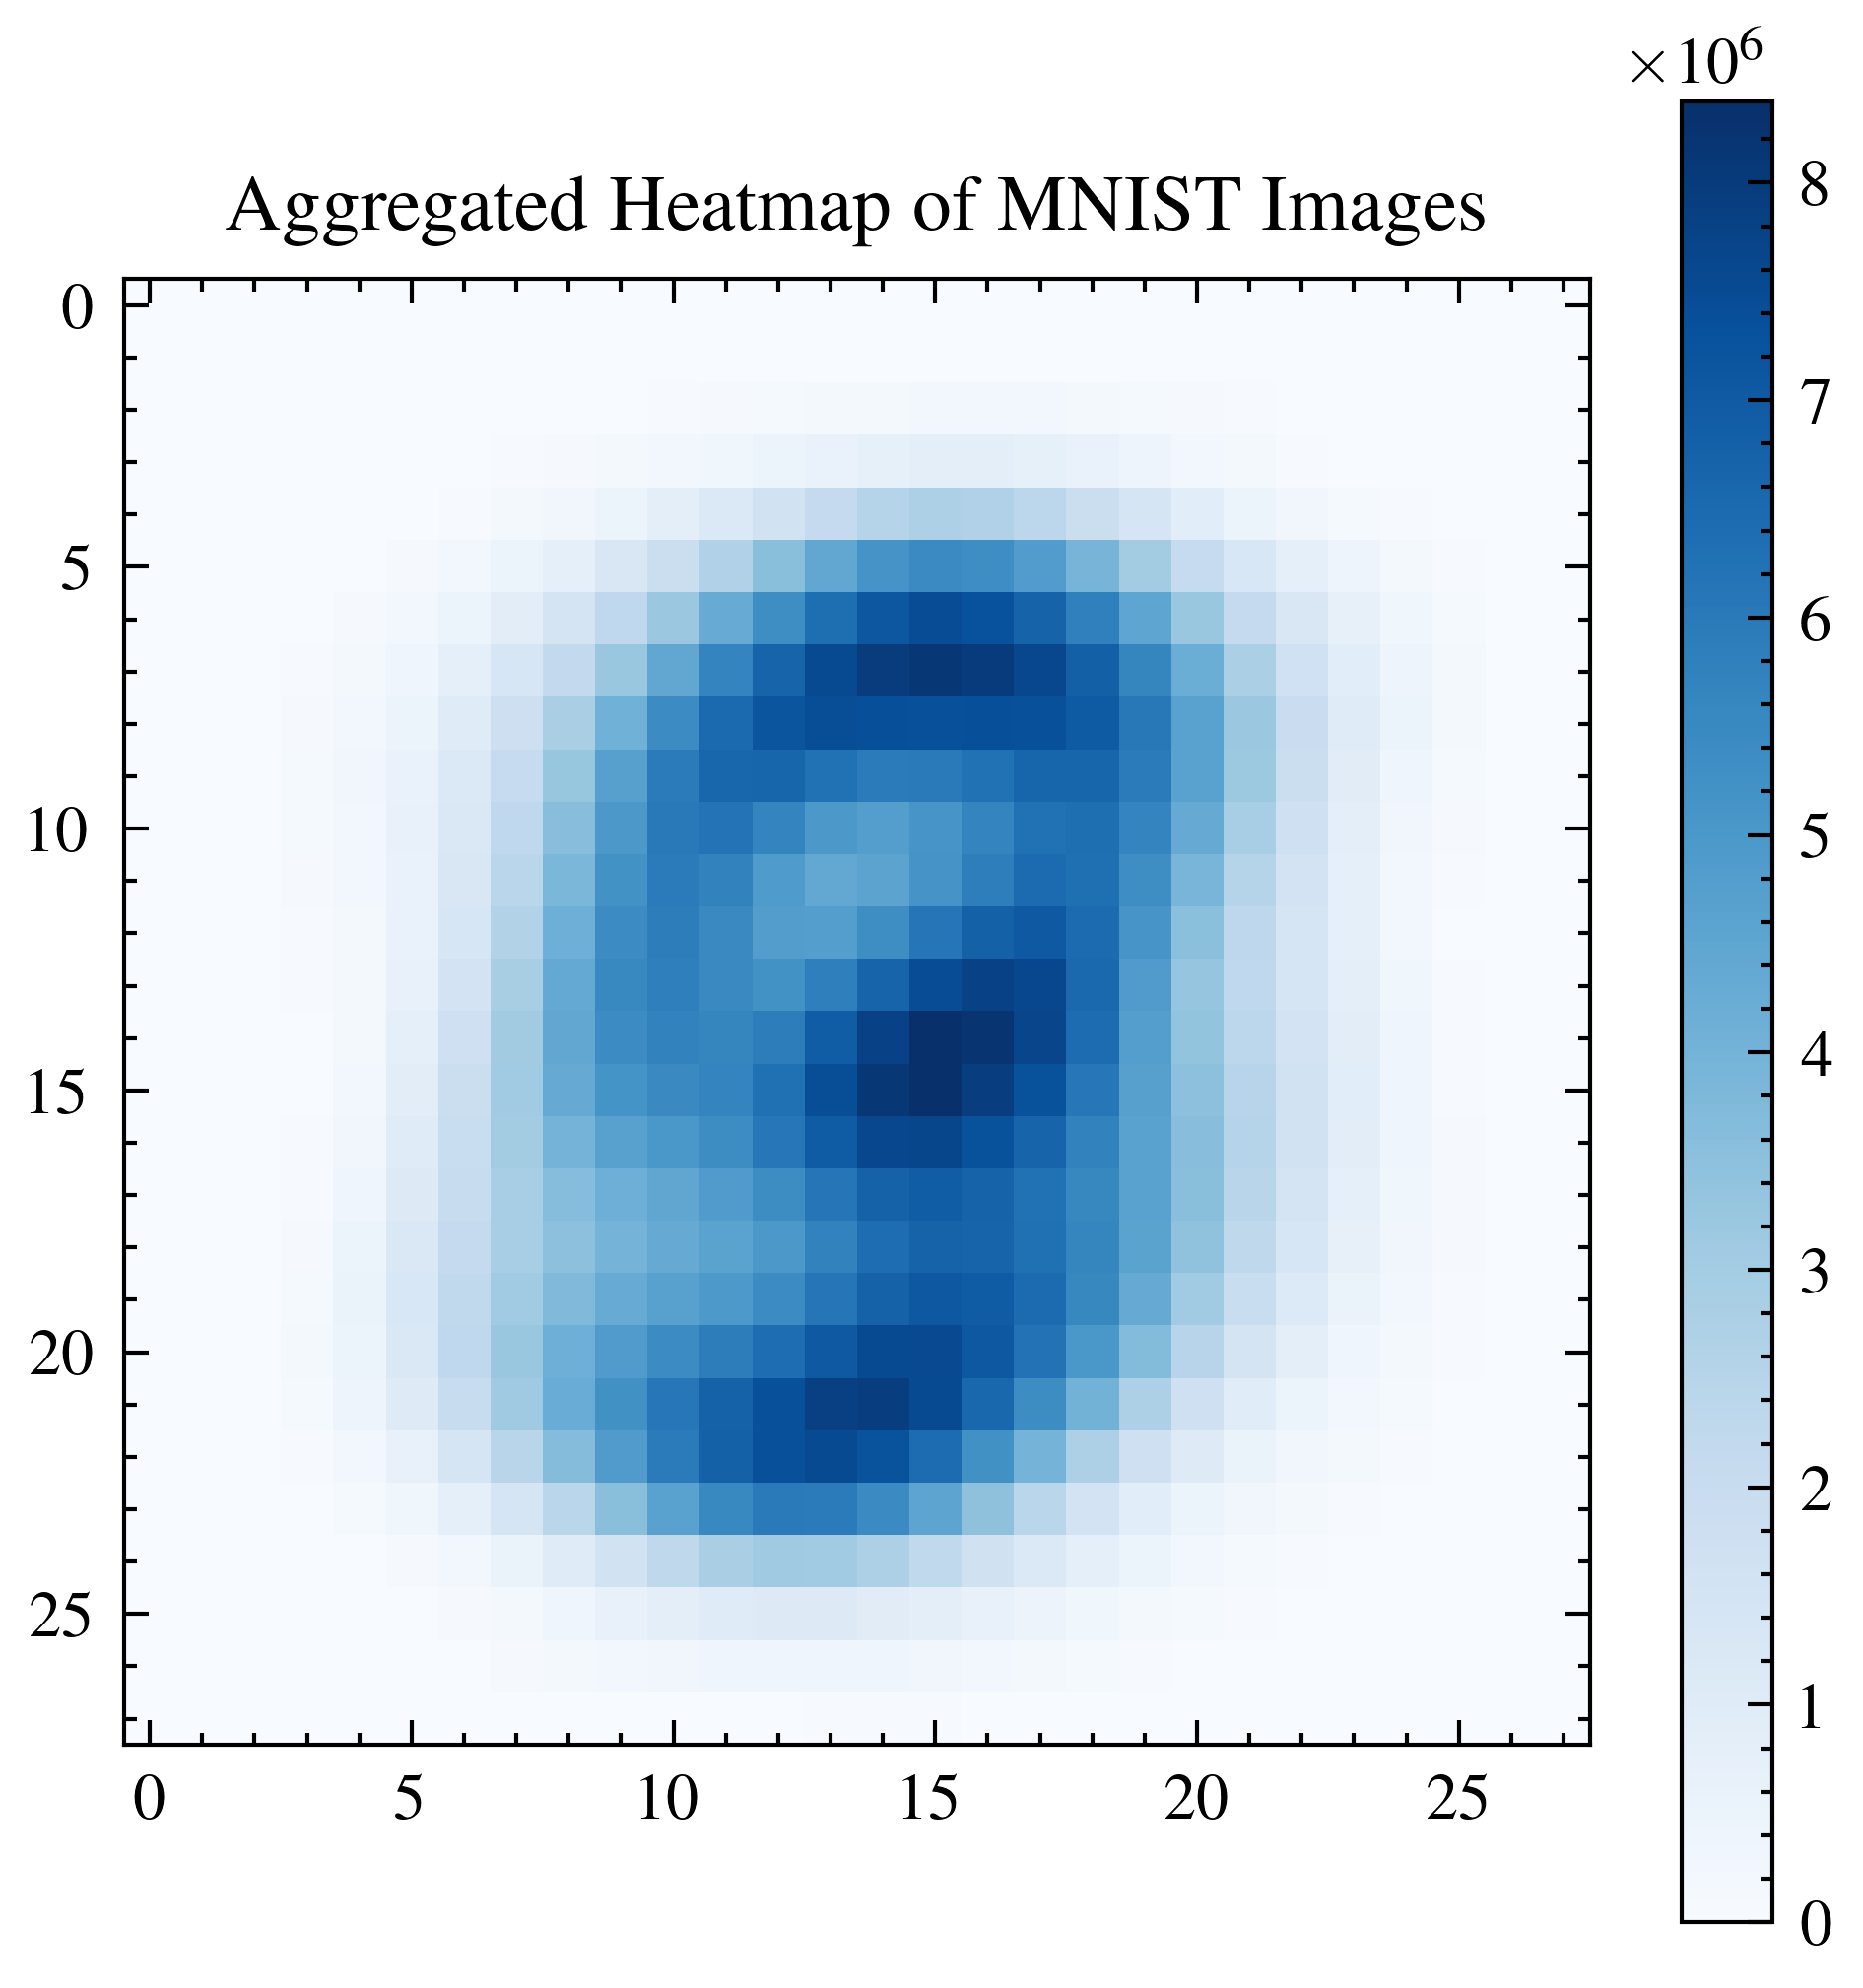

In [6]:
# Extract pixel values
pixels = mnist_train.iloc[:, 1:].values

# Reshape pixel values into 28x28 matrices
images = pixels.reshape(-1, 28, 28)

# Sum up the pixel values of all images
aggregated_image = np.sum(images, axis=0)

# Plot the aggregated heatmap
plt.figure(figsize=(4, 4))
plt.imshow(aggregated_image, cmap='Blues')
plt.title('Aggregated Heatmap of MNIST Images')
plt.colorbar()
plt.grid(False)
plt.show()

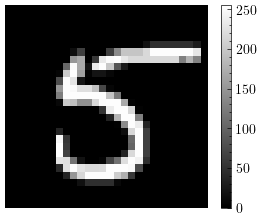

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_data = X_train[0]
some_digit_image = some_digit_data.reshape(28, 28)

# imshow plots the matrix
plt.imshow(some_digit_image,cmap='gray')
plt.axis("off")
plt.colorbar()
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)


In [5]:
display(len(X_test))

12000

In [9]:
knn_vi = permutation_importance(knn, X_test, y_test, random_state=42,n_jobs=-2)


KeyboardInterrupt: 

In [6]:
from sklearn.metrics import classification_report,accuracy_score

display(accuracy_score(y_test, knn_preds))
knn_fi = knn_vi['importances_mean']

0.9715

NameError: name 'knn_vi' is not defined

In [15]:
knn_fi[knn_fi < 0] = 0
min_val = np.min(knn_fi)
max_val = np.max(knn_fi)
scaled_arr = ((knn_fi - min_val) / (max_val - min_val)) * 255



784

259

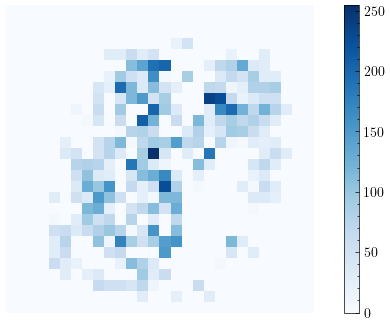

In [16]:
display(len(knn_fi))
fis = np.nonzero(knn_fi)[0]
display(len(fis))
with plt.style.context('science'):
    # imshow plots the matrix
    plt.figure(figsize = (8,4))
    plt.imshow(scaled_arr.reshape(28,28), cmap=plt.cm.Blues)
    plt.axis("off")
    plt.colorbar()
    plt.show()

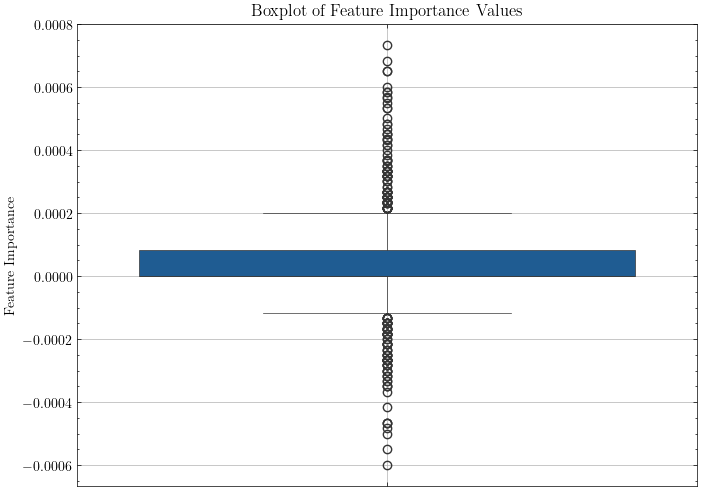

In [14]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=knn_vi['importances_mean'], linewidth=0.5, whis=1.5)
plt.title("Boxplot of Feature Importance Values")
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()


In [7]:
# Fitting different regression models
# Linear Regression
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
models = ['KNN', 'Random forest', 'XGBoost',"MLP"]
accuracies = []
f1_scores = []


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))

# Random Forest Regression
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf_reg.fit(X_train, y_train)
preds =  rf_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))

# # XGBoost Regression
xgb_reg = XGBClassifier(random_state=42)
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))
# Multi-layer Perceptron Regression
mlp_reg = MLPClassifier(hidden_layer_sizes=(100), max_iter=2000, random_state=42)
mlp_reg.fit(X_train, y_train)
preds = mlp_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))
# Example usage with custom colors


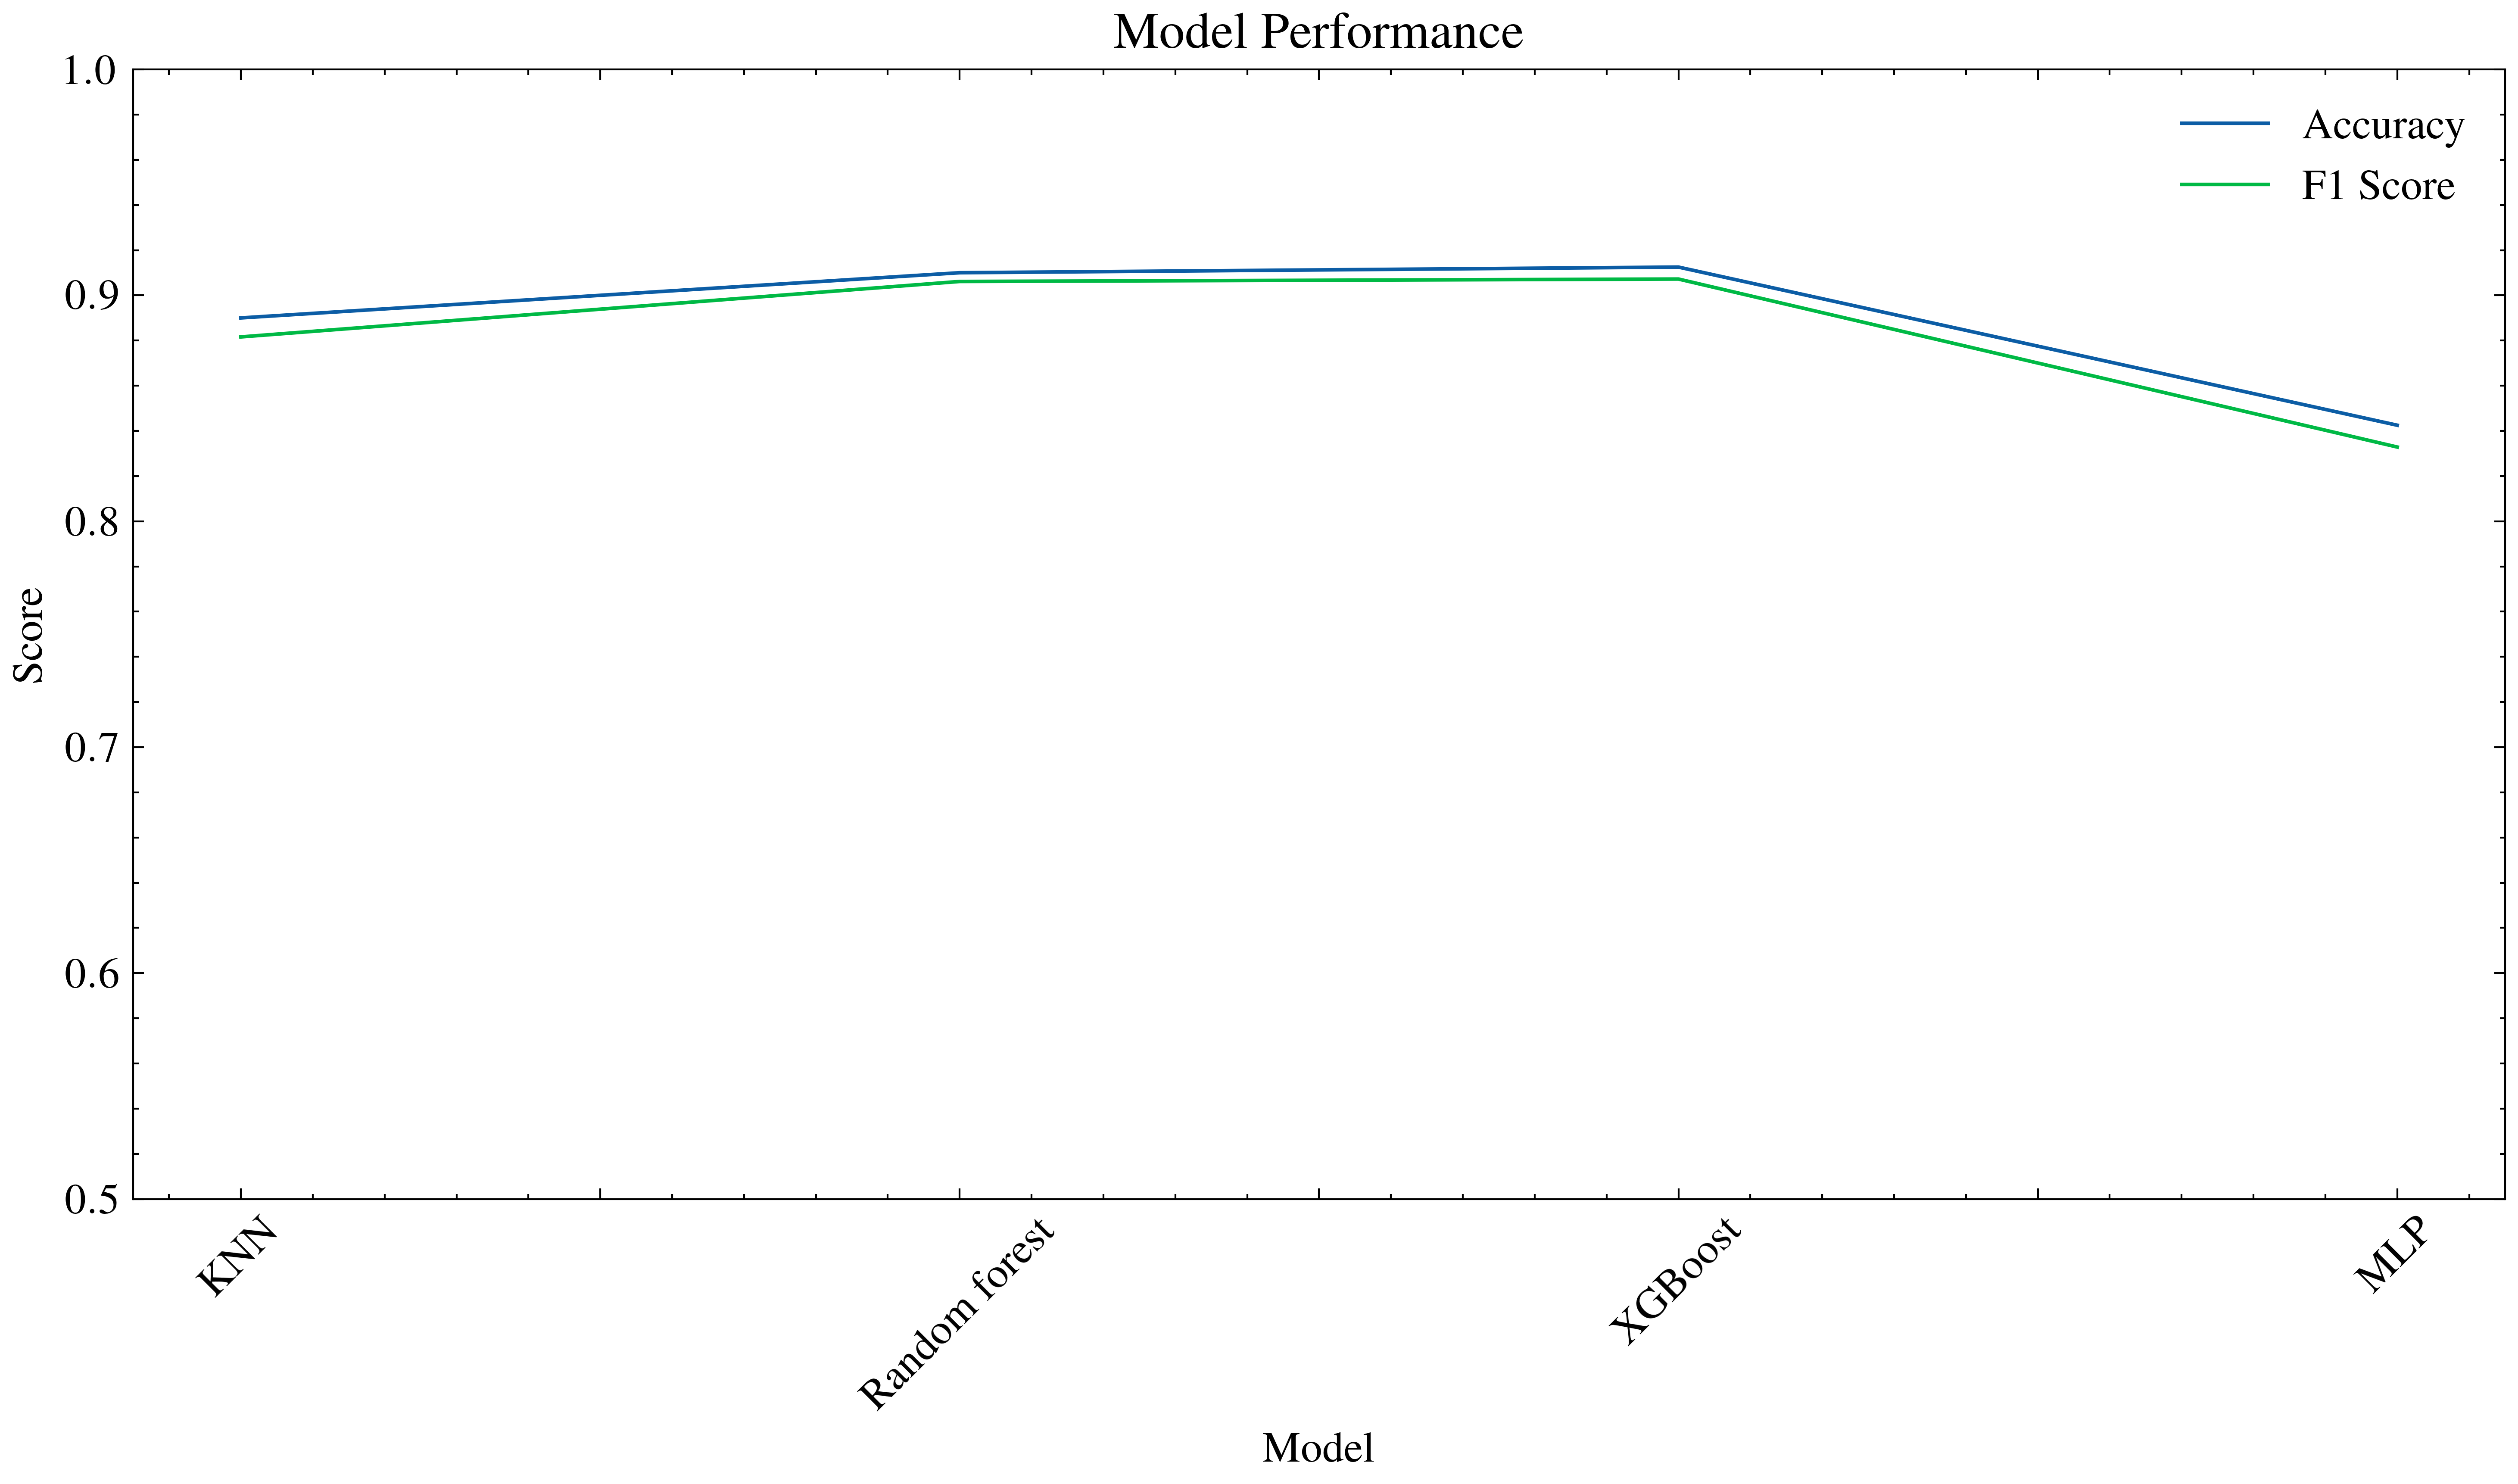

In [15]:
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'F1 Score': f1_scores})
with plt.style.context('science'):
    ax = df.plot(x='Model', kind='line', figsize=(10, 6), rot=45)
    plt.rcParams['font.size'] = 12
    ax.set_ylim(0.5, 1)
    ax.set_ylabel('Score')
    ax.set_title('Model Performance')
    plt.tight_layout()
    plt.show()



In [83]:
# Fitting different regression models
# Linear Regression
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


from sklearn.neighbors import KNeighborsClassifier
y_train = mnist_train["label"].copy().to_numpy()
X_train = mnist_train.drop(columns=["label"]).to_numpy()
X_train_first_1000 = X_train[:1300]
Y_train_first_1000 = y_train[:1300]
X_train_first_1000 = np.delete(X_train_first_1000,fis,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_train_first_1000, Y_train_first_1000, test_size=0.2, random_state=42)
models = ['KNN', 'Random forest', 'XGBoost',"MLP"]
accuracies = []
f1_scores = []
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))
# Random Forest Regression
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf_reg.fit(X_train, y_train)
preds =  rf_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))

# # XGBoost Regression
xgb_reg = XGBClassifier(random_state=42)
xgb_reg.fit(X_train, y_train)
preds = xgb_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))
# Multi-layer Perceptron Regression
mlp_reg = MLPClassifier(hidden_layer_sizes=(100), max_iter=2000, random_state=42)
mlp_reg.fit(X_train, y_train)
preds = mlp_reg.predict(X_test)
accuracies.append(accuracy_score(y_test, preds))
f1_scores.append(f1_score(y_test, preds, average='macro'))
# Example usage with custom colors
models = {
    'XGBoost': xgb_reg,
    'Random Forest': rf_reg,
    'Multi Layer Perceptron': mlp_reg,
    "K Nearest NEighbor":knn
}
models = ['KNN', 'Random forest', 'XGBoost',"MLP"]


,Model,Accuracy,F1 Score
0,KNN,0.711538,0.701178
1,Random forest,0.761538,0.732184
2,XGBoost,0.765385,0.747331
3,MLP,0.607692,0.598009


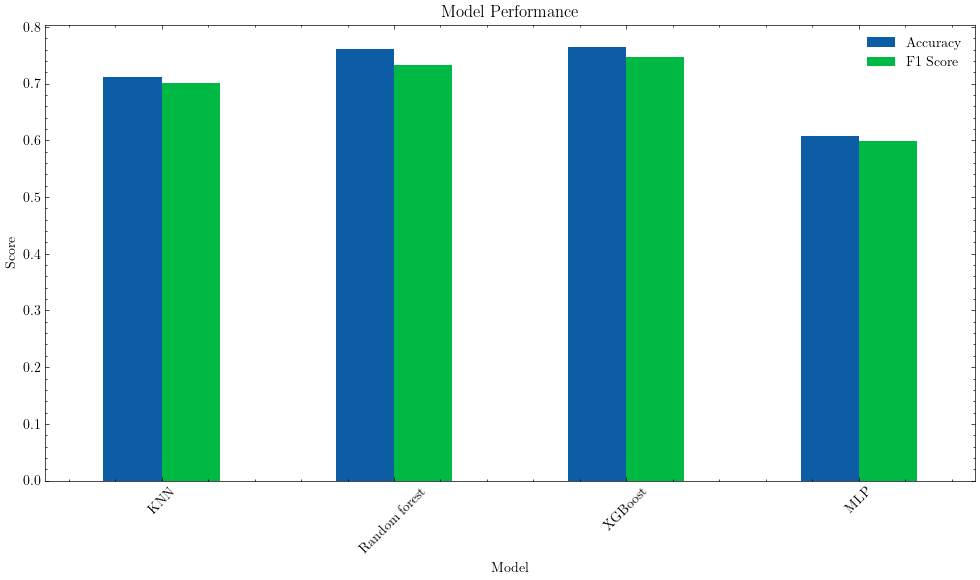

In [84]:
df = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'F1 Score': f1_scores})
display(df)
ax = df.plot(x='Model', kind='bar', figsize=(10, 6), rot=45)
ax.set_ylabel('Score')
ax.set_title('Model Performance')
plt.tight_layout()
plt.show()


784

1.0

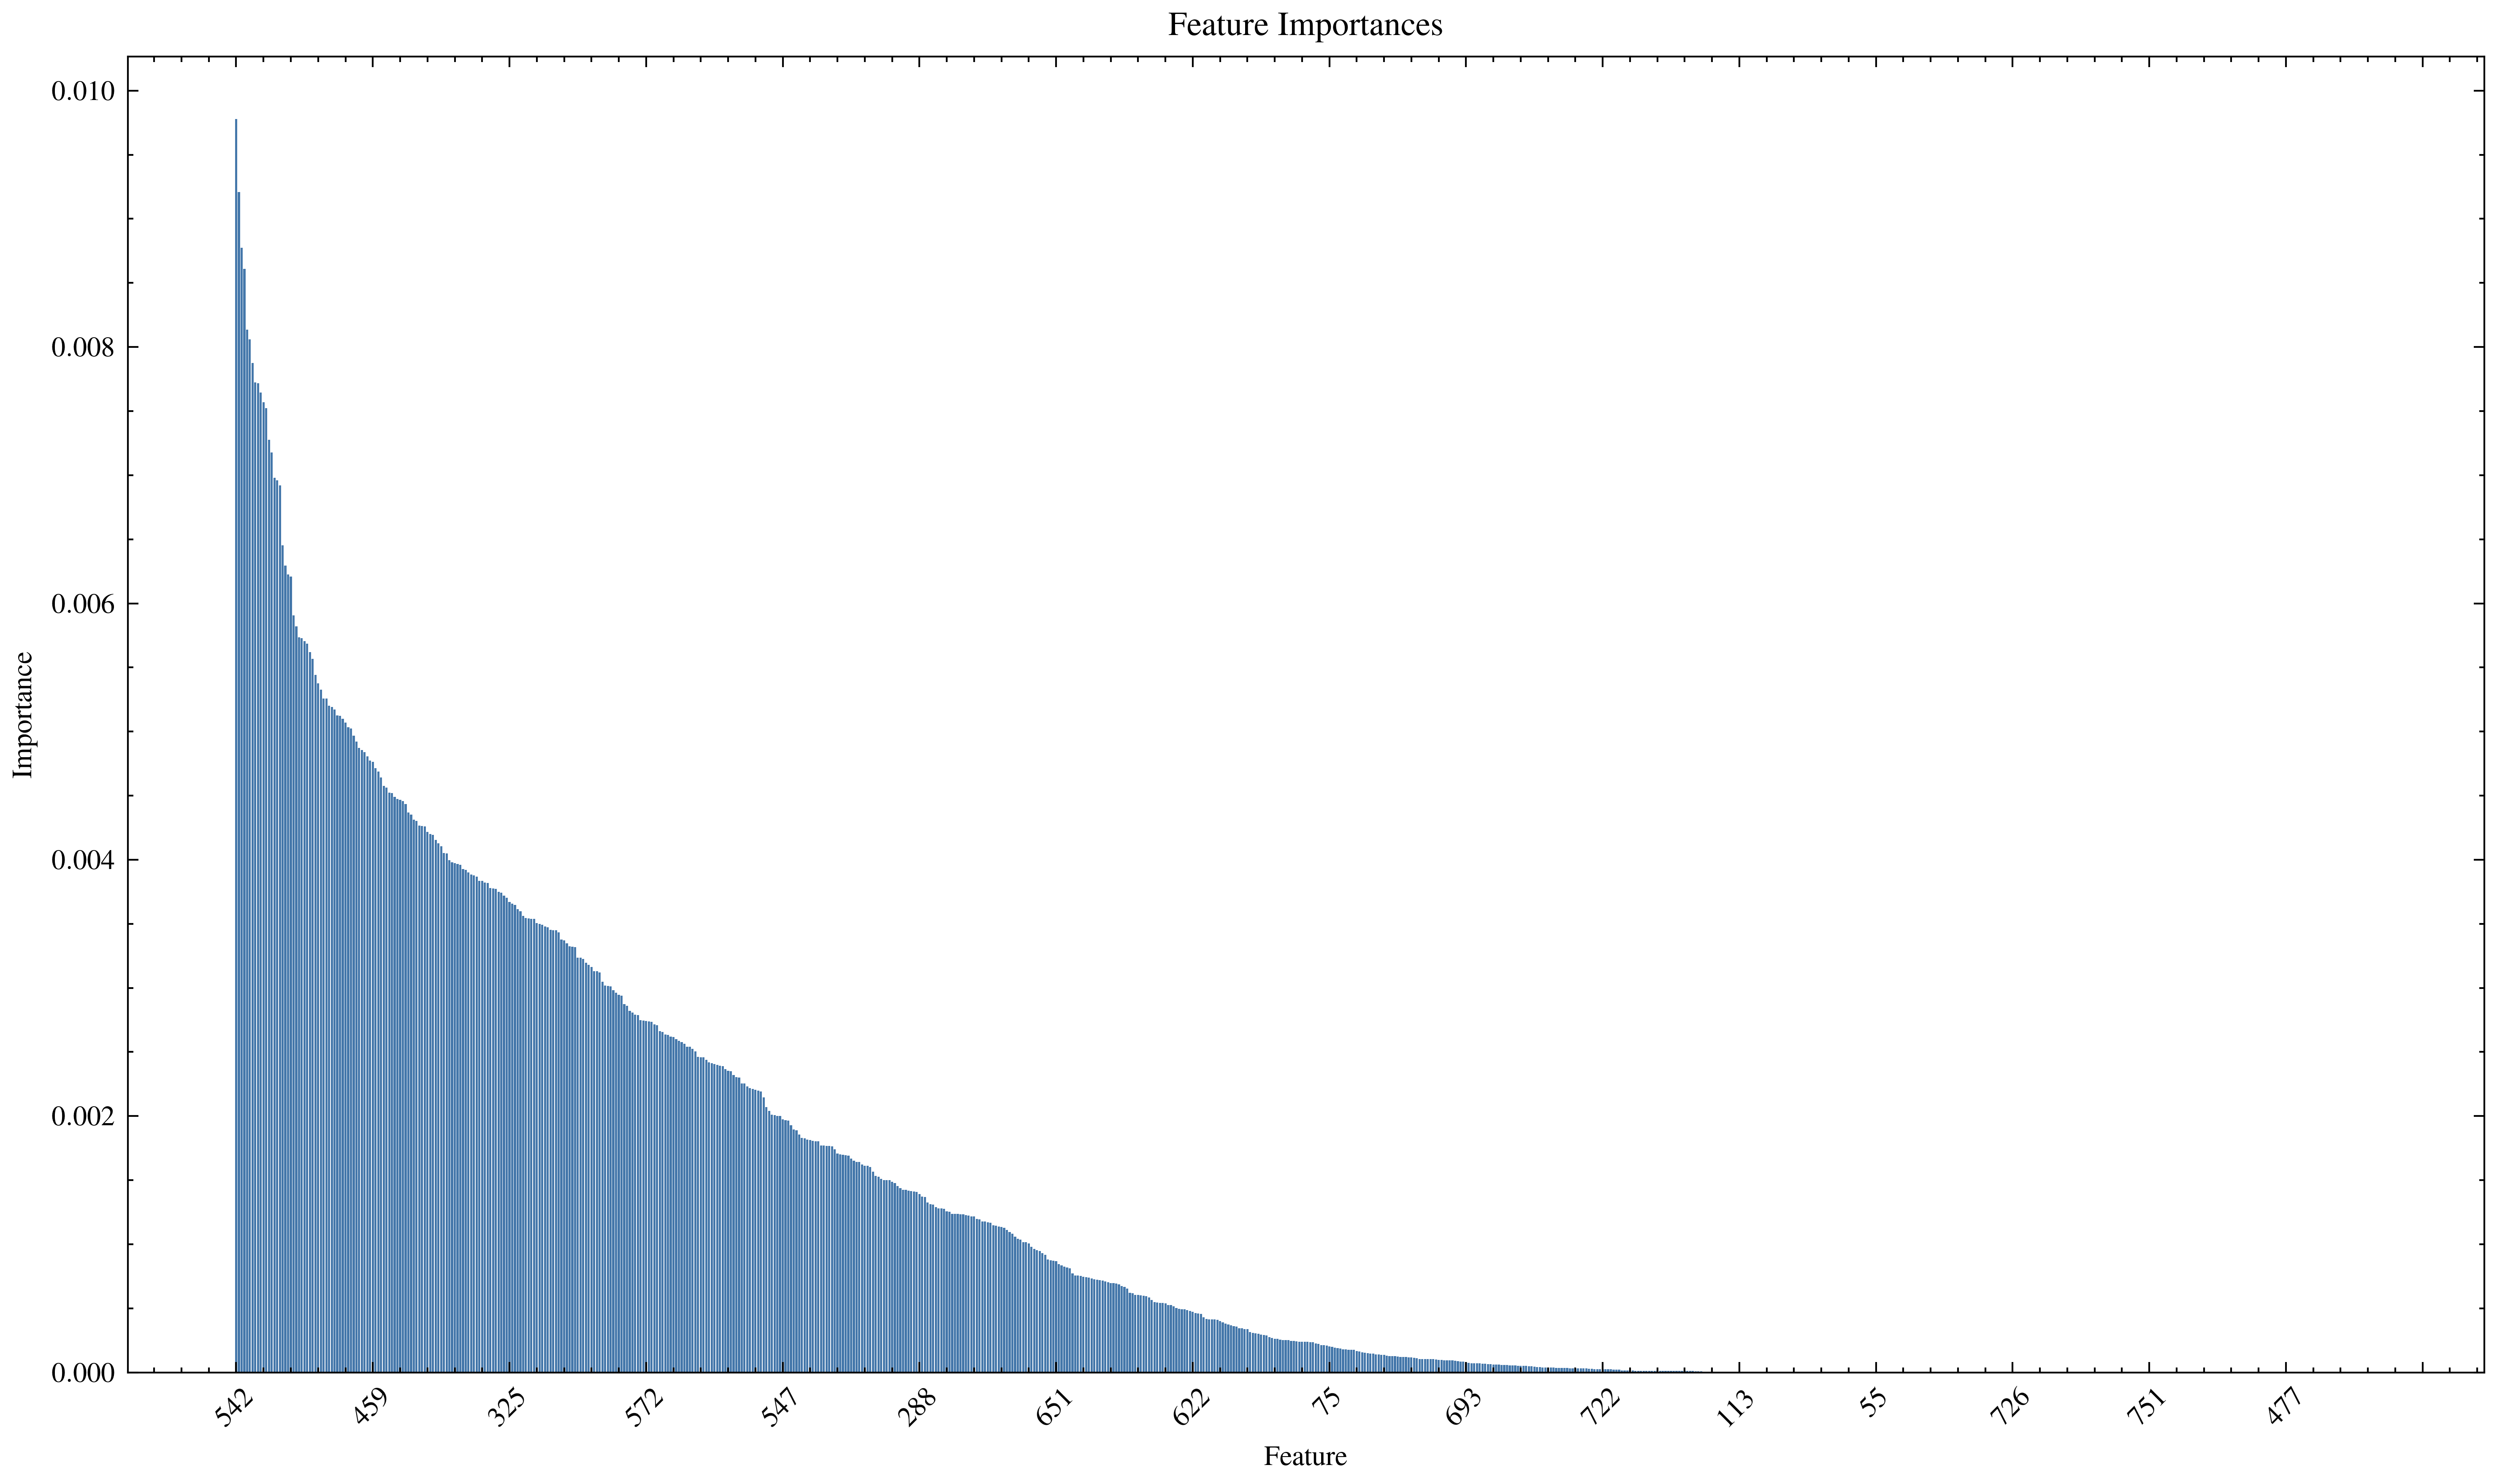

In [12]:
from matplotlib.ticker import MultipleLocator


importances = rf_reg.feature_importances_
display(len(importances))
indices = np.argsort(importances)[::-1]

display(np.sum(importances))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [i for i in indices], rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(50))  # Adjust the interval as needed
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



C:\Users\versu\AppData\Local\Temp\ipykernel_22936\1501348169.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(importances, shade=True)


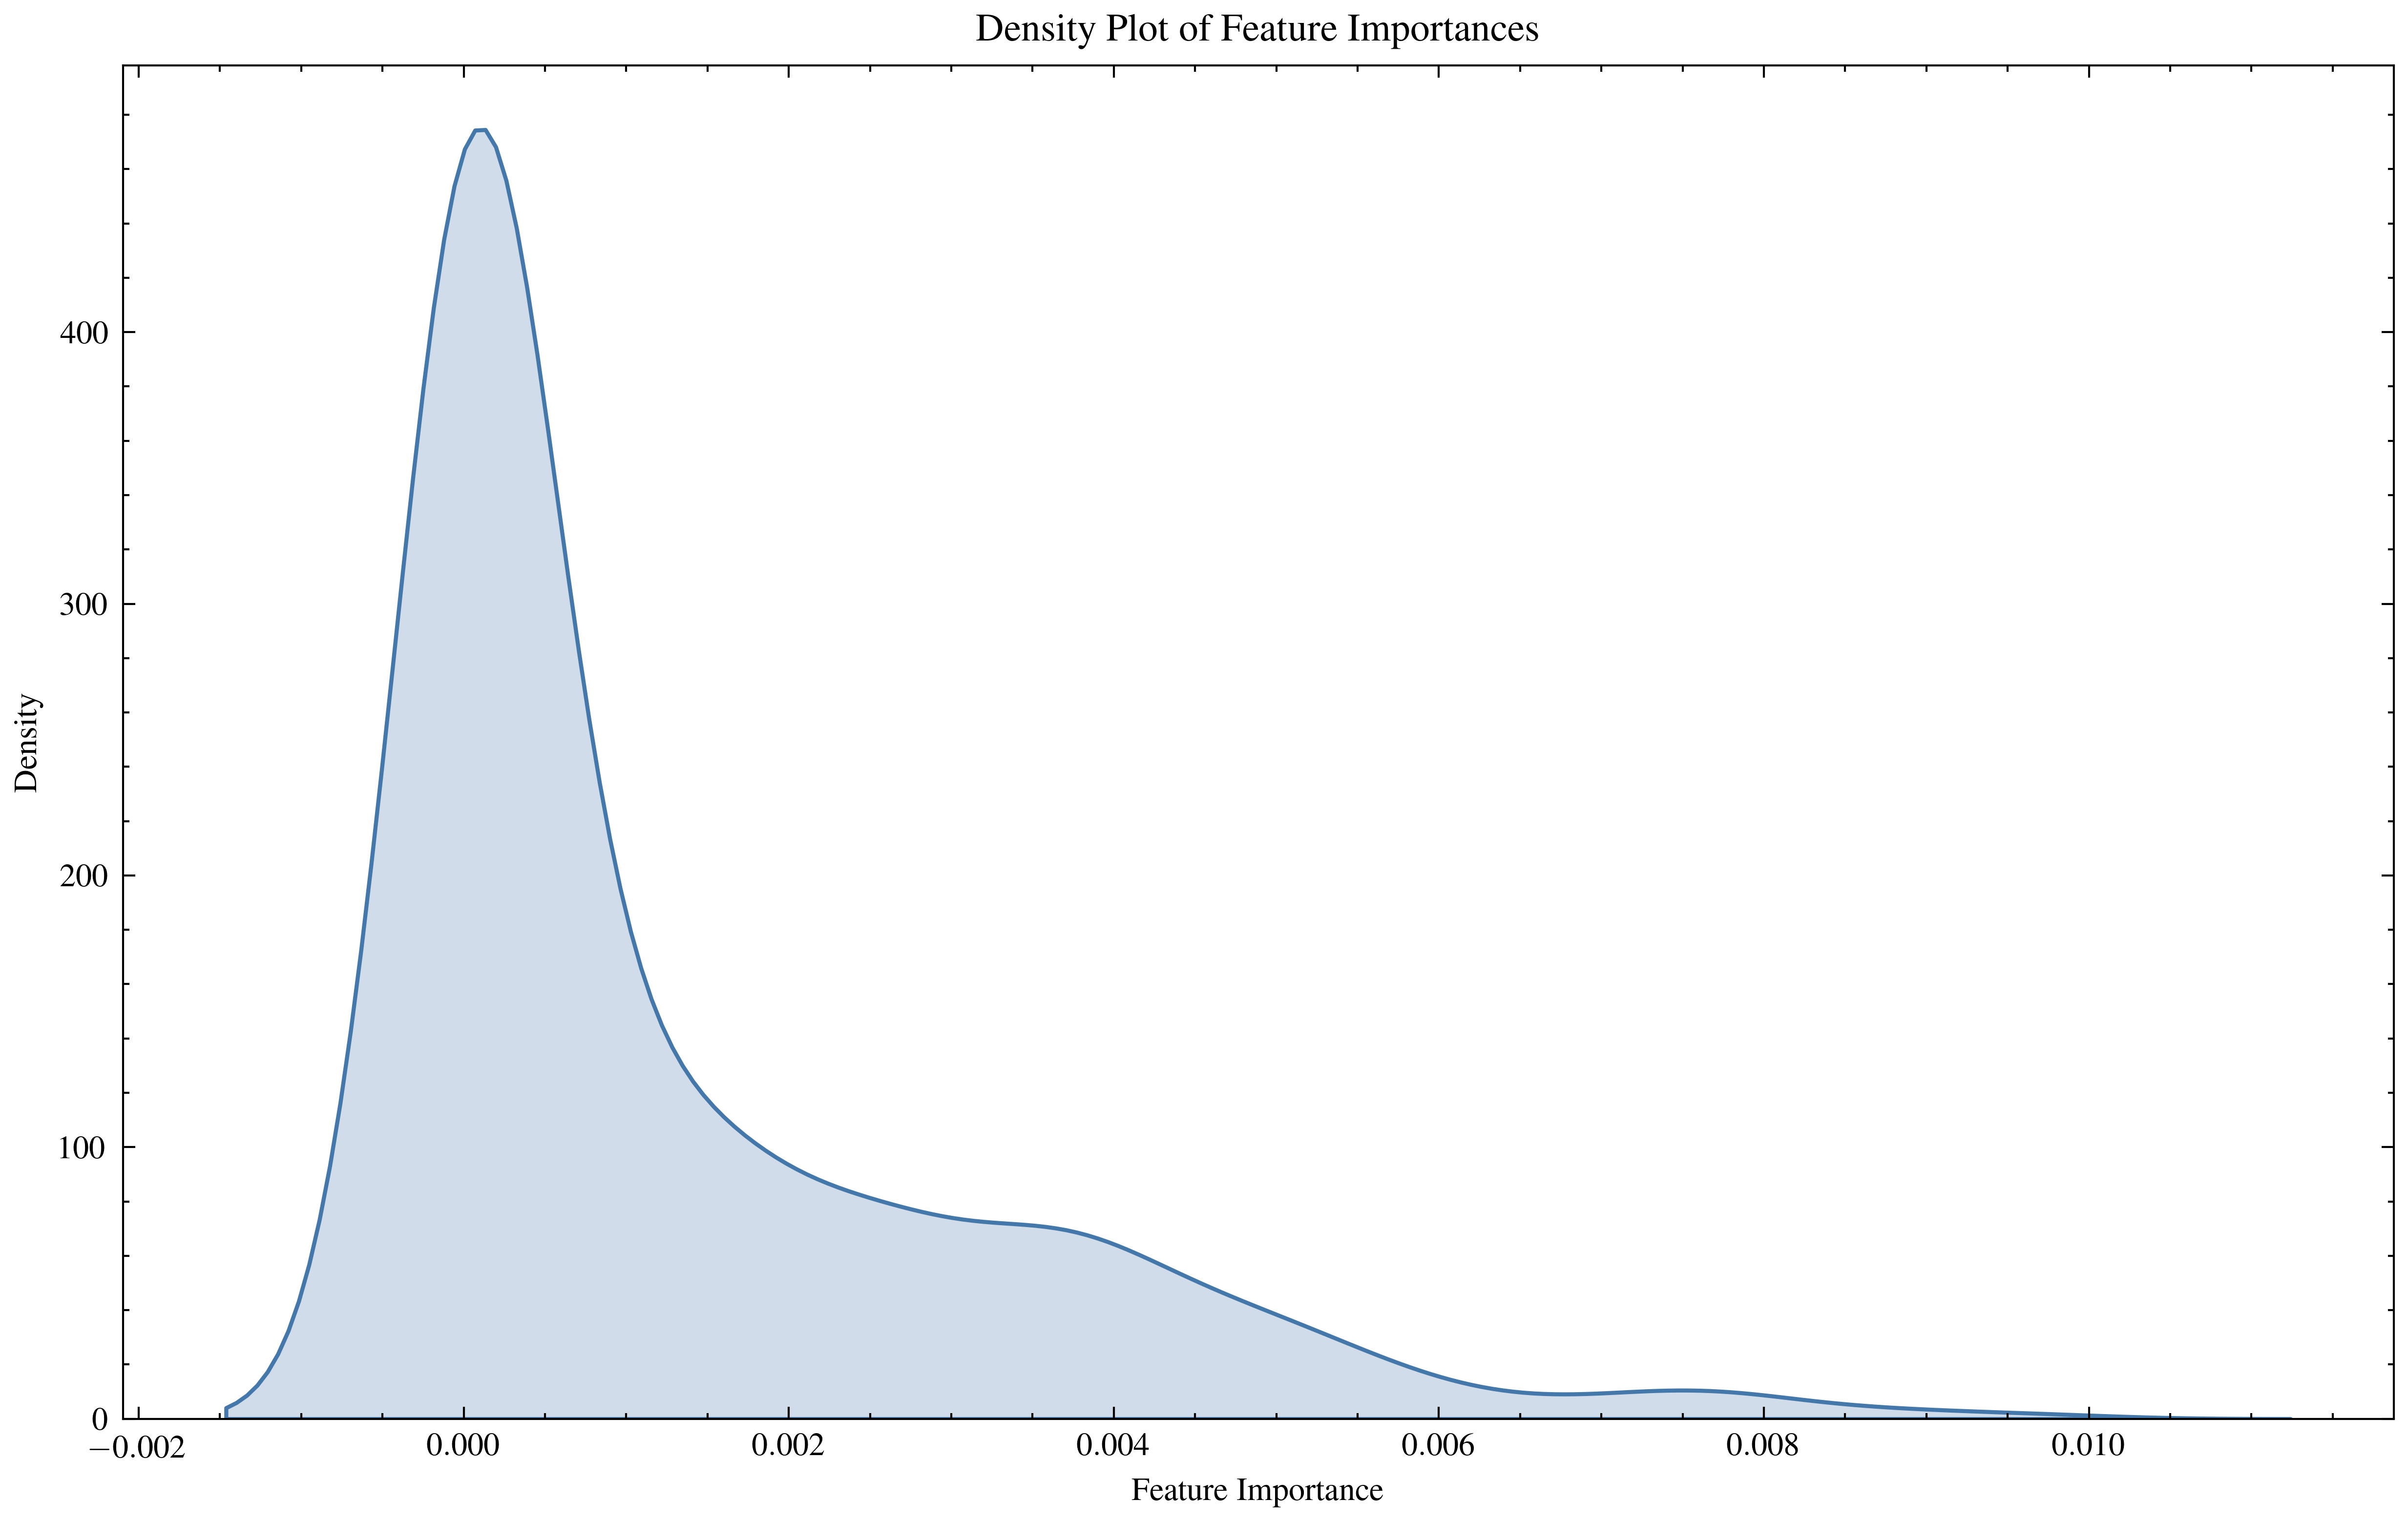

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(importances, shade=True)
plt.xlabel('Feature Importance')
plt.ylabel('Density')
plt.title('Density Plot of Feature Importances')
plt.show()

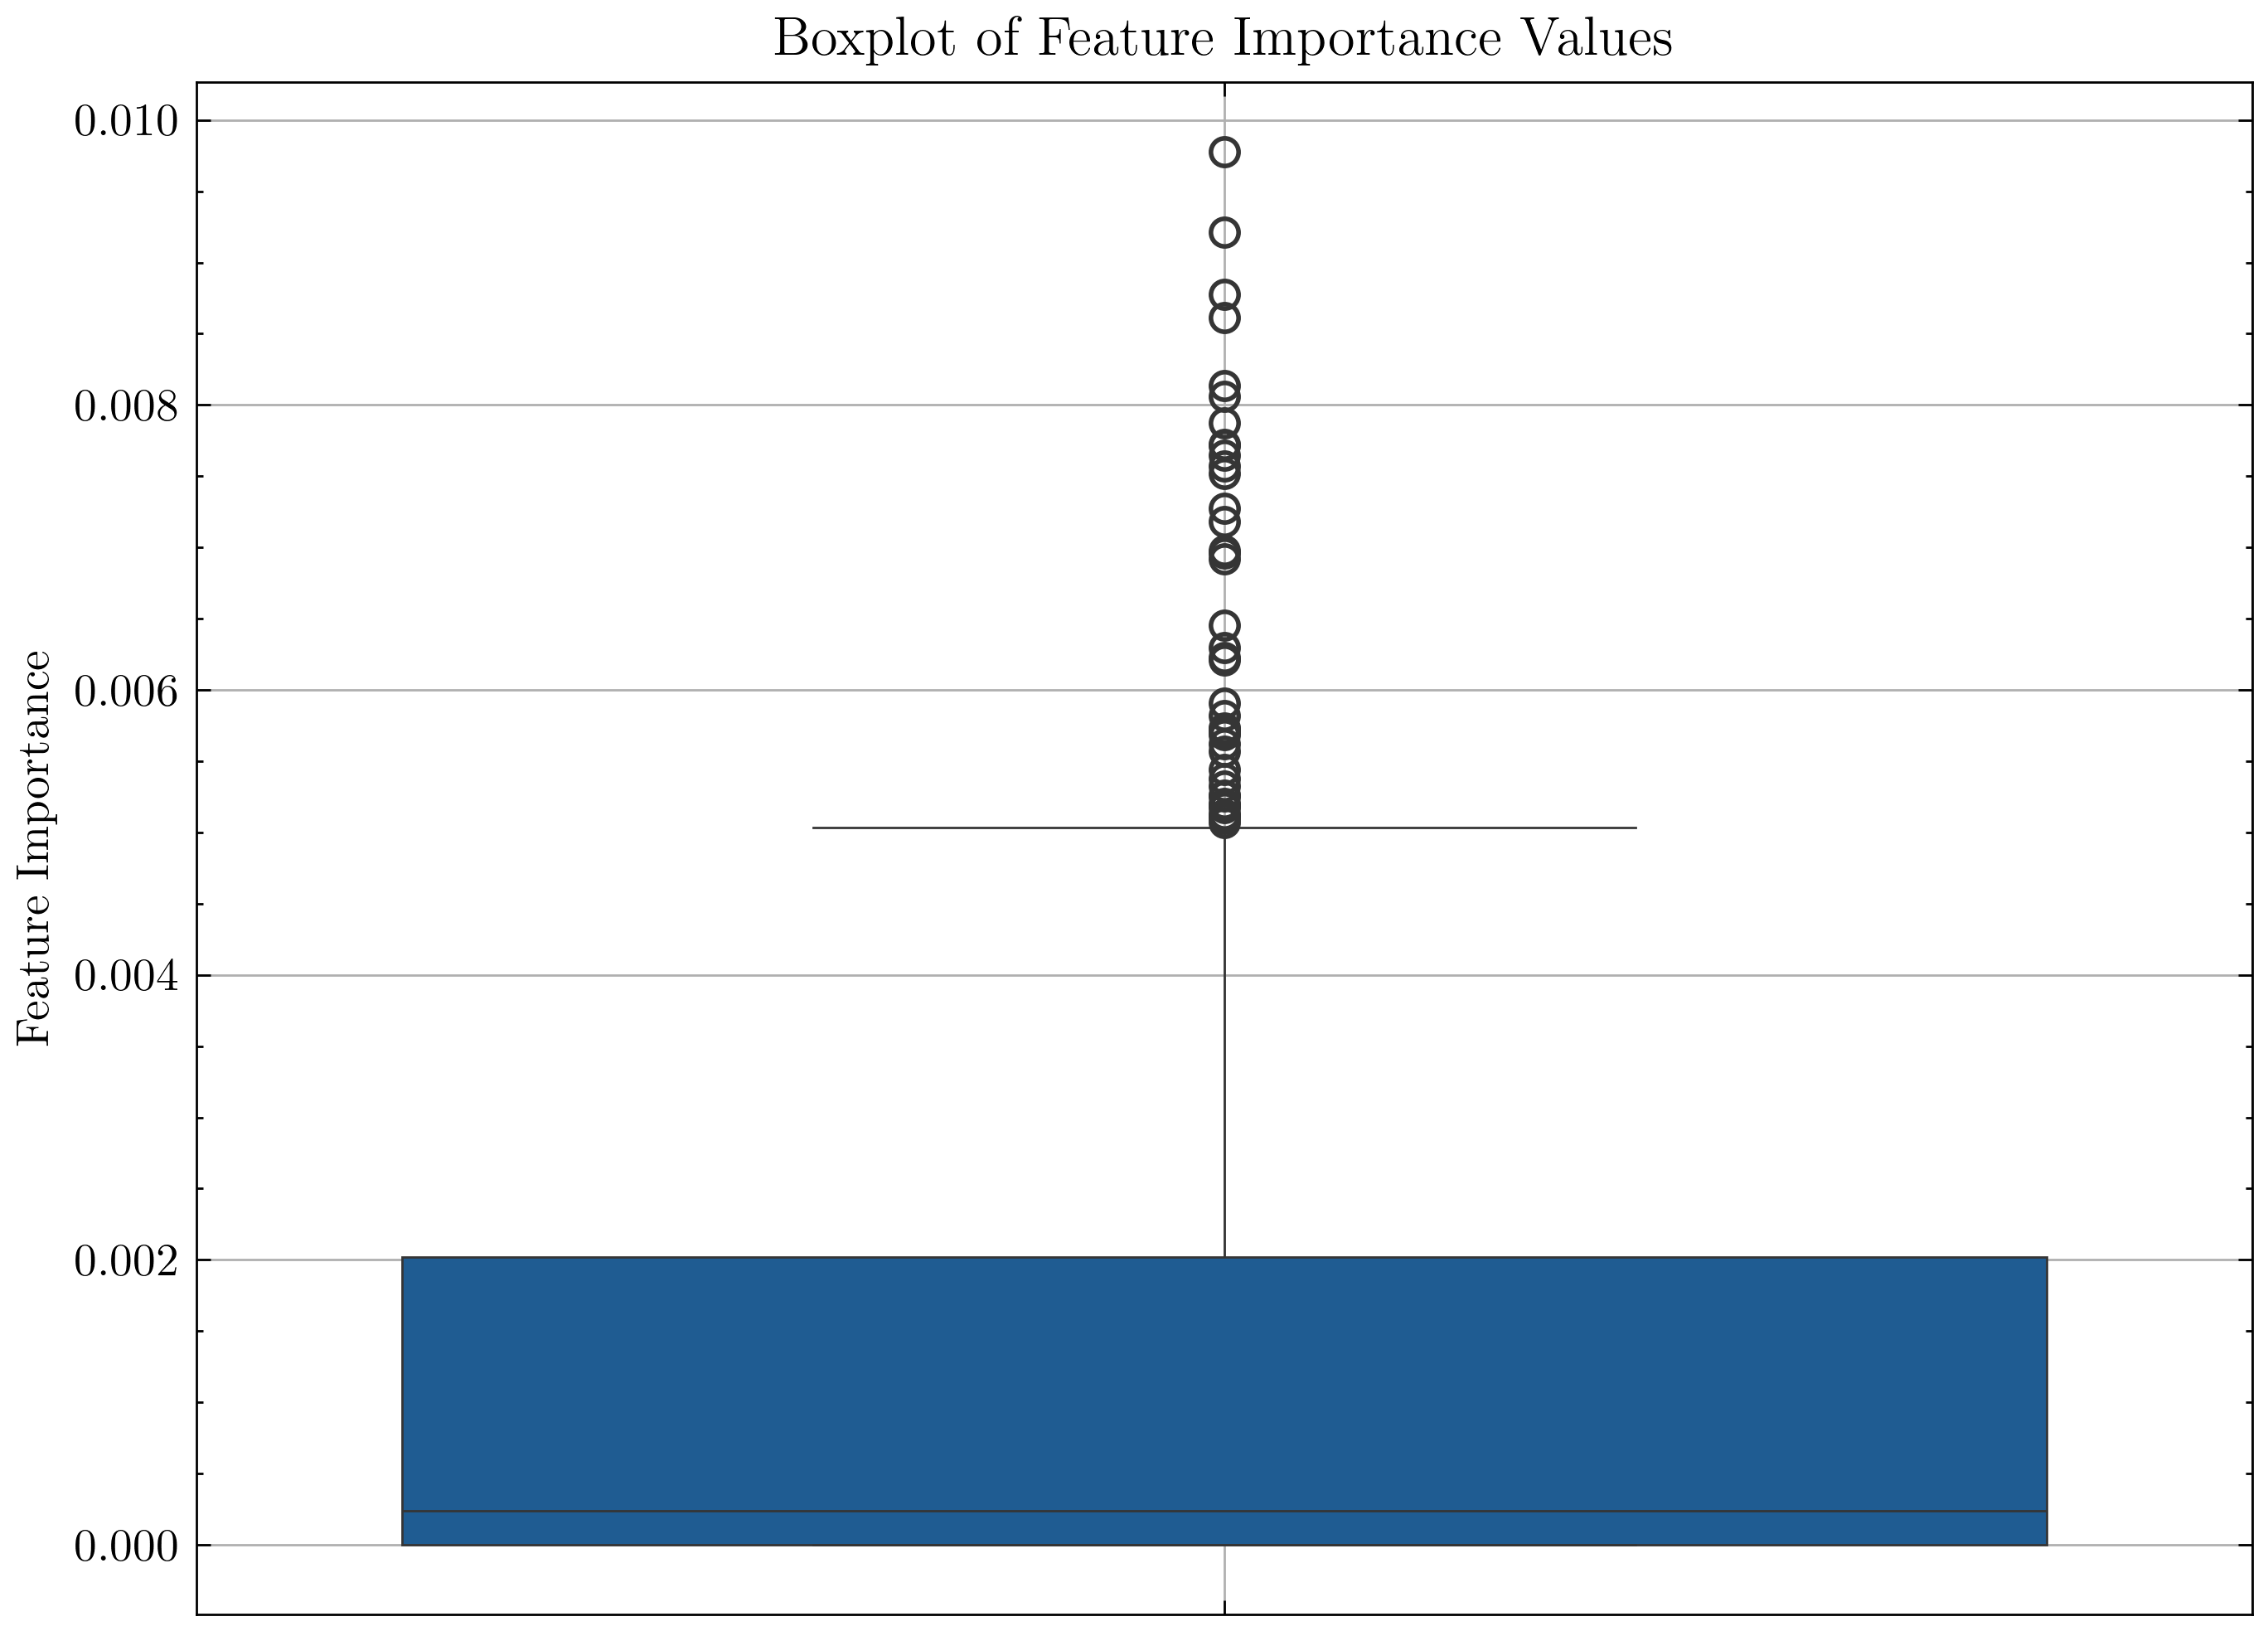

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined `importances`

plt.figure(figsize=(8, 6))
sns.boxplot(y=importances, linewidth=0.5, whis=1.5)
plt.title("Boxplot of Feature Importance Values")
plt.ylabel("Feature Importance")
plt.grid(True)
plt.show()


In [17]:
display(len(importances))
importances[importances < 0.002] = 0
fis = np.nonzero(importances)[0]
display(fis)
display(len(fis))

784

array([101, 150, 151, 152, 153, 154, 155, 156, 157, 178, 179, 180, 181,
       182, 183, 184, 185, 207, 208, 209, 210, 211, 212, 213, 214, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 261, 262, 263, 264,
       265, 266, 267, 268, 269, 270, 271, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 329, 330, 345, 346, 347, 348, 349, 350,
       351, 352, 353, 354, 358, 372, 373, 374, 375, 376, 377, 378, 379,
       380, 381, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
       410, 413, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 493, 494,
       510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 538,
       539, 541, 542, 543, 544, 545, 546, 549, 550, 567, 568, 569, 570,
       571, 572, 573, 574, 575, 577, 578, 579, 595, 596, 597, 59

200

In [14]:
display(importances[fis])
display(len(importances[fis]))

array([0.0035673 , 0.00220289, 0.00278308, 0.00307341, 0.00459457,
       0.00556322, 0.00720017, 0.00420444, 0.00312147, 0.00218915,
       0.00241582, 0.00291022, 0.0023768 , 0.00294066, 0.00377298,
       0.00660933, 0.00353944, 0.00218122, 0.0023982 , 0.00211138,
       0.00231855, 0.00379703, 0.0061695 , 0.00968237, 0.00406602,
       0.00271351, 0.00236252, 0.00269527, 0.0024247 , 0.00281995,
       0.00415147, 0.00439872, 0.0054469 , 0.00419956, 0.0028766 ,
       0.00301037, 0.00371446, 0.00212004, 0.00405759, 0.00513558,
       0.00314845, 0.00322561, 0.00389462, 0.00519559, 0.0036537 ,
       0.003554  , 0.00363247, 0.00384311, 0.00270426, 0.00323593,
       0.00652275, 0.00494658, 0.00338713, 0.0028596 , 0.00401252,
       0.00400198, 0.00373528, 0.00427011, 0.00464207, 0.00361294,
       0.00297743, 0.00201542, 0.00205942, 0.0039135 , 0.00608088,
       0.00565827, 0.00437626, 0.00275585, 0.0041715 , 0.00528969,
       0.0035309 , 0.00389381, 0.00519413, 0.0030673 , 0.00225

192

In [18]:
rf_fi = permutation_importance(rf_reg, X_test, y_test,n_jobs=-1, random_state=42)


In [20]:
rf_fi_mean = rf_fi['importances_mean']


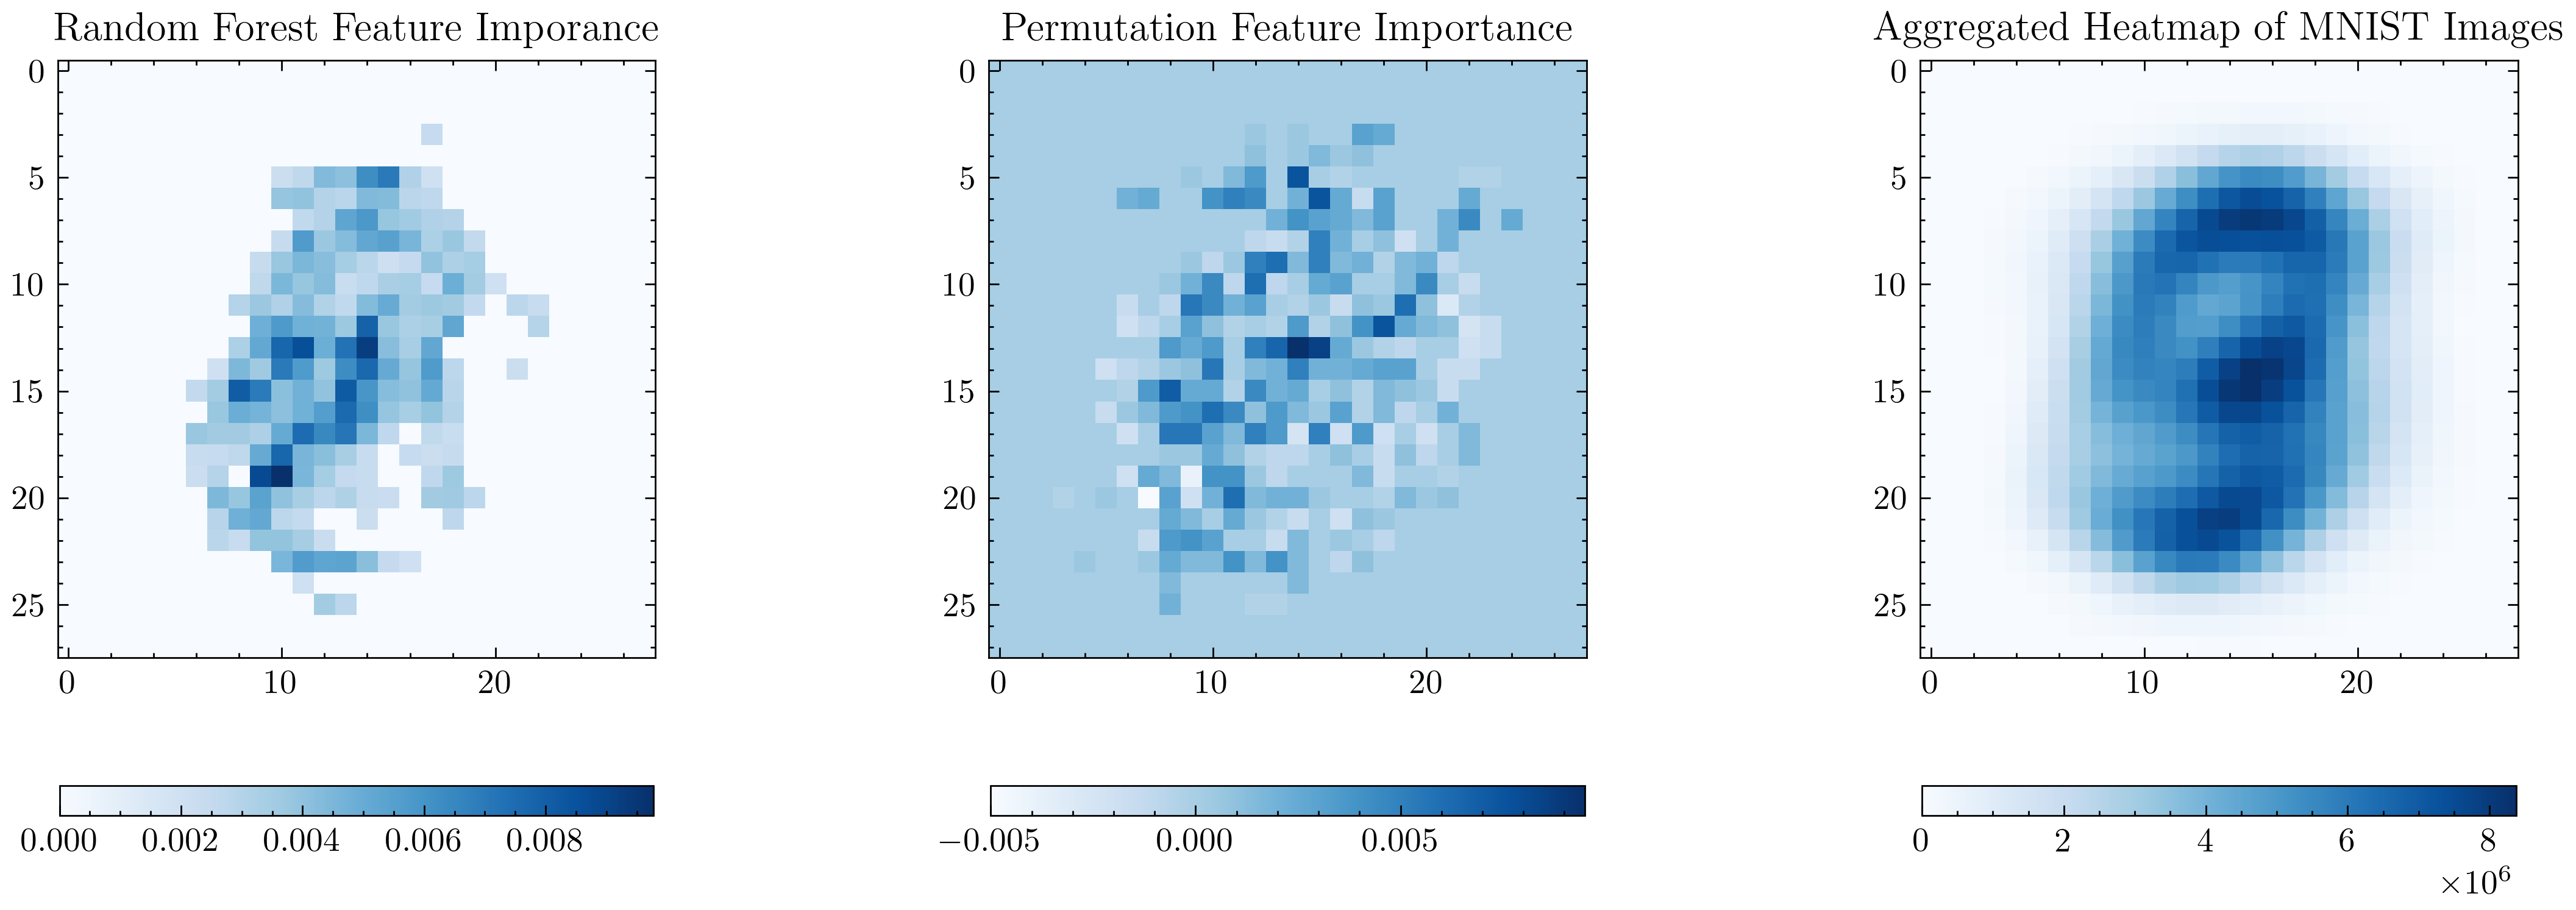

In [40]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_data = importances
some_digit_image = some_digit_data.reshape(28, 28)

# First Image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(some_digit_image, cmap=plt.cm.Blues)
plt.title('Random Forest Feature Imporance')
plt.colorbar(location='bottom', shrink=0.6)

# Second Image
plt.subplot(1, 3, 2)
plt.imshow(rf_fi_mean.reshape(28,28), cmap=plt.cm.Blues)
plt.title('Permutation Feature Importance')
plt.colorbar(location='bottom', shrink=0.6)
# Second Image
# Extract pixel values
pixels = mnist_train.iloc[:, 1:].values

# Reshape pixel values into 28x28 matrices
images = pixels.reshape(-1, 28, 28)

# Sum up the pixel values of all images
aggregated_image = np.sum(images, axis=0)

# Plot the aggregated heatmap
plt.subplot(1, 3, 3)
plt.imshow(aggregated_image, cmap='Blues')
plt.title('Aggregated Heatmap of MNIST Images')
plt.colorbar(location='bottom', shrink=0.6)
plt.grid(False)

plt.tight_layout()
plt.show()

In [26]:
%%capture
from sklearn.inspection import PartialDependenceDisplay

# Convert array indices to subplot indices
valid_indices_subplot = np.unravel_index(fis, (28, 28))
fig, axes = plt.subplots(28, 28, figsize=(15, 15))
my_plot = None

for i in range(28):
    for j in range(28):
        index = i * 28 + j
        if (i, j) not in zip(*valid_indices_subplot):
            axes[i, j].axis('off')  
            axes[i, j].text(0.5, 0.5, index, ha='center', va='center', fontsize=8)  
        else:
            disp = PartialDependenceDisplay.from_estimator(rf_reg, X_train,features=[index],target=1, percentiles=(0, 1),n_jobs=-1)
            feature_values = disp.pd_results[0]["values"][0]
            average_predictions = disp.pd_results[0]["average"][1]    
            axes[i, j].plot(feature_values, average_predictions)
            axes[i, j].axis('off')           
my_plot  = fig


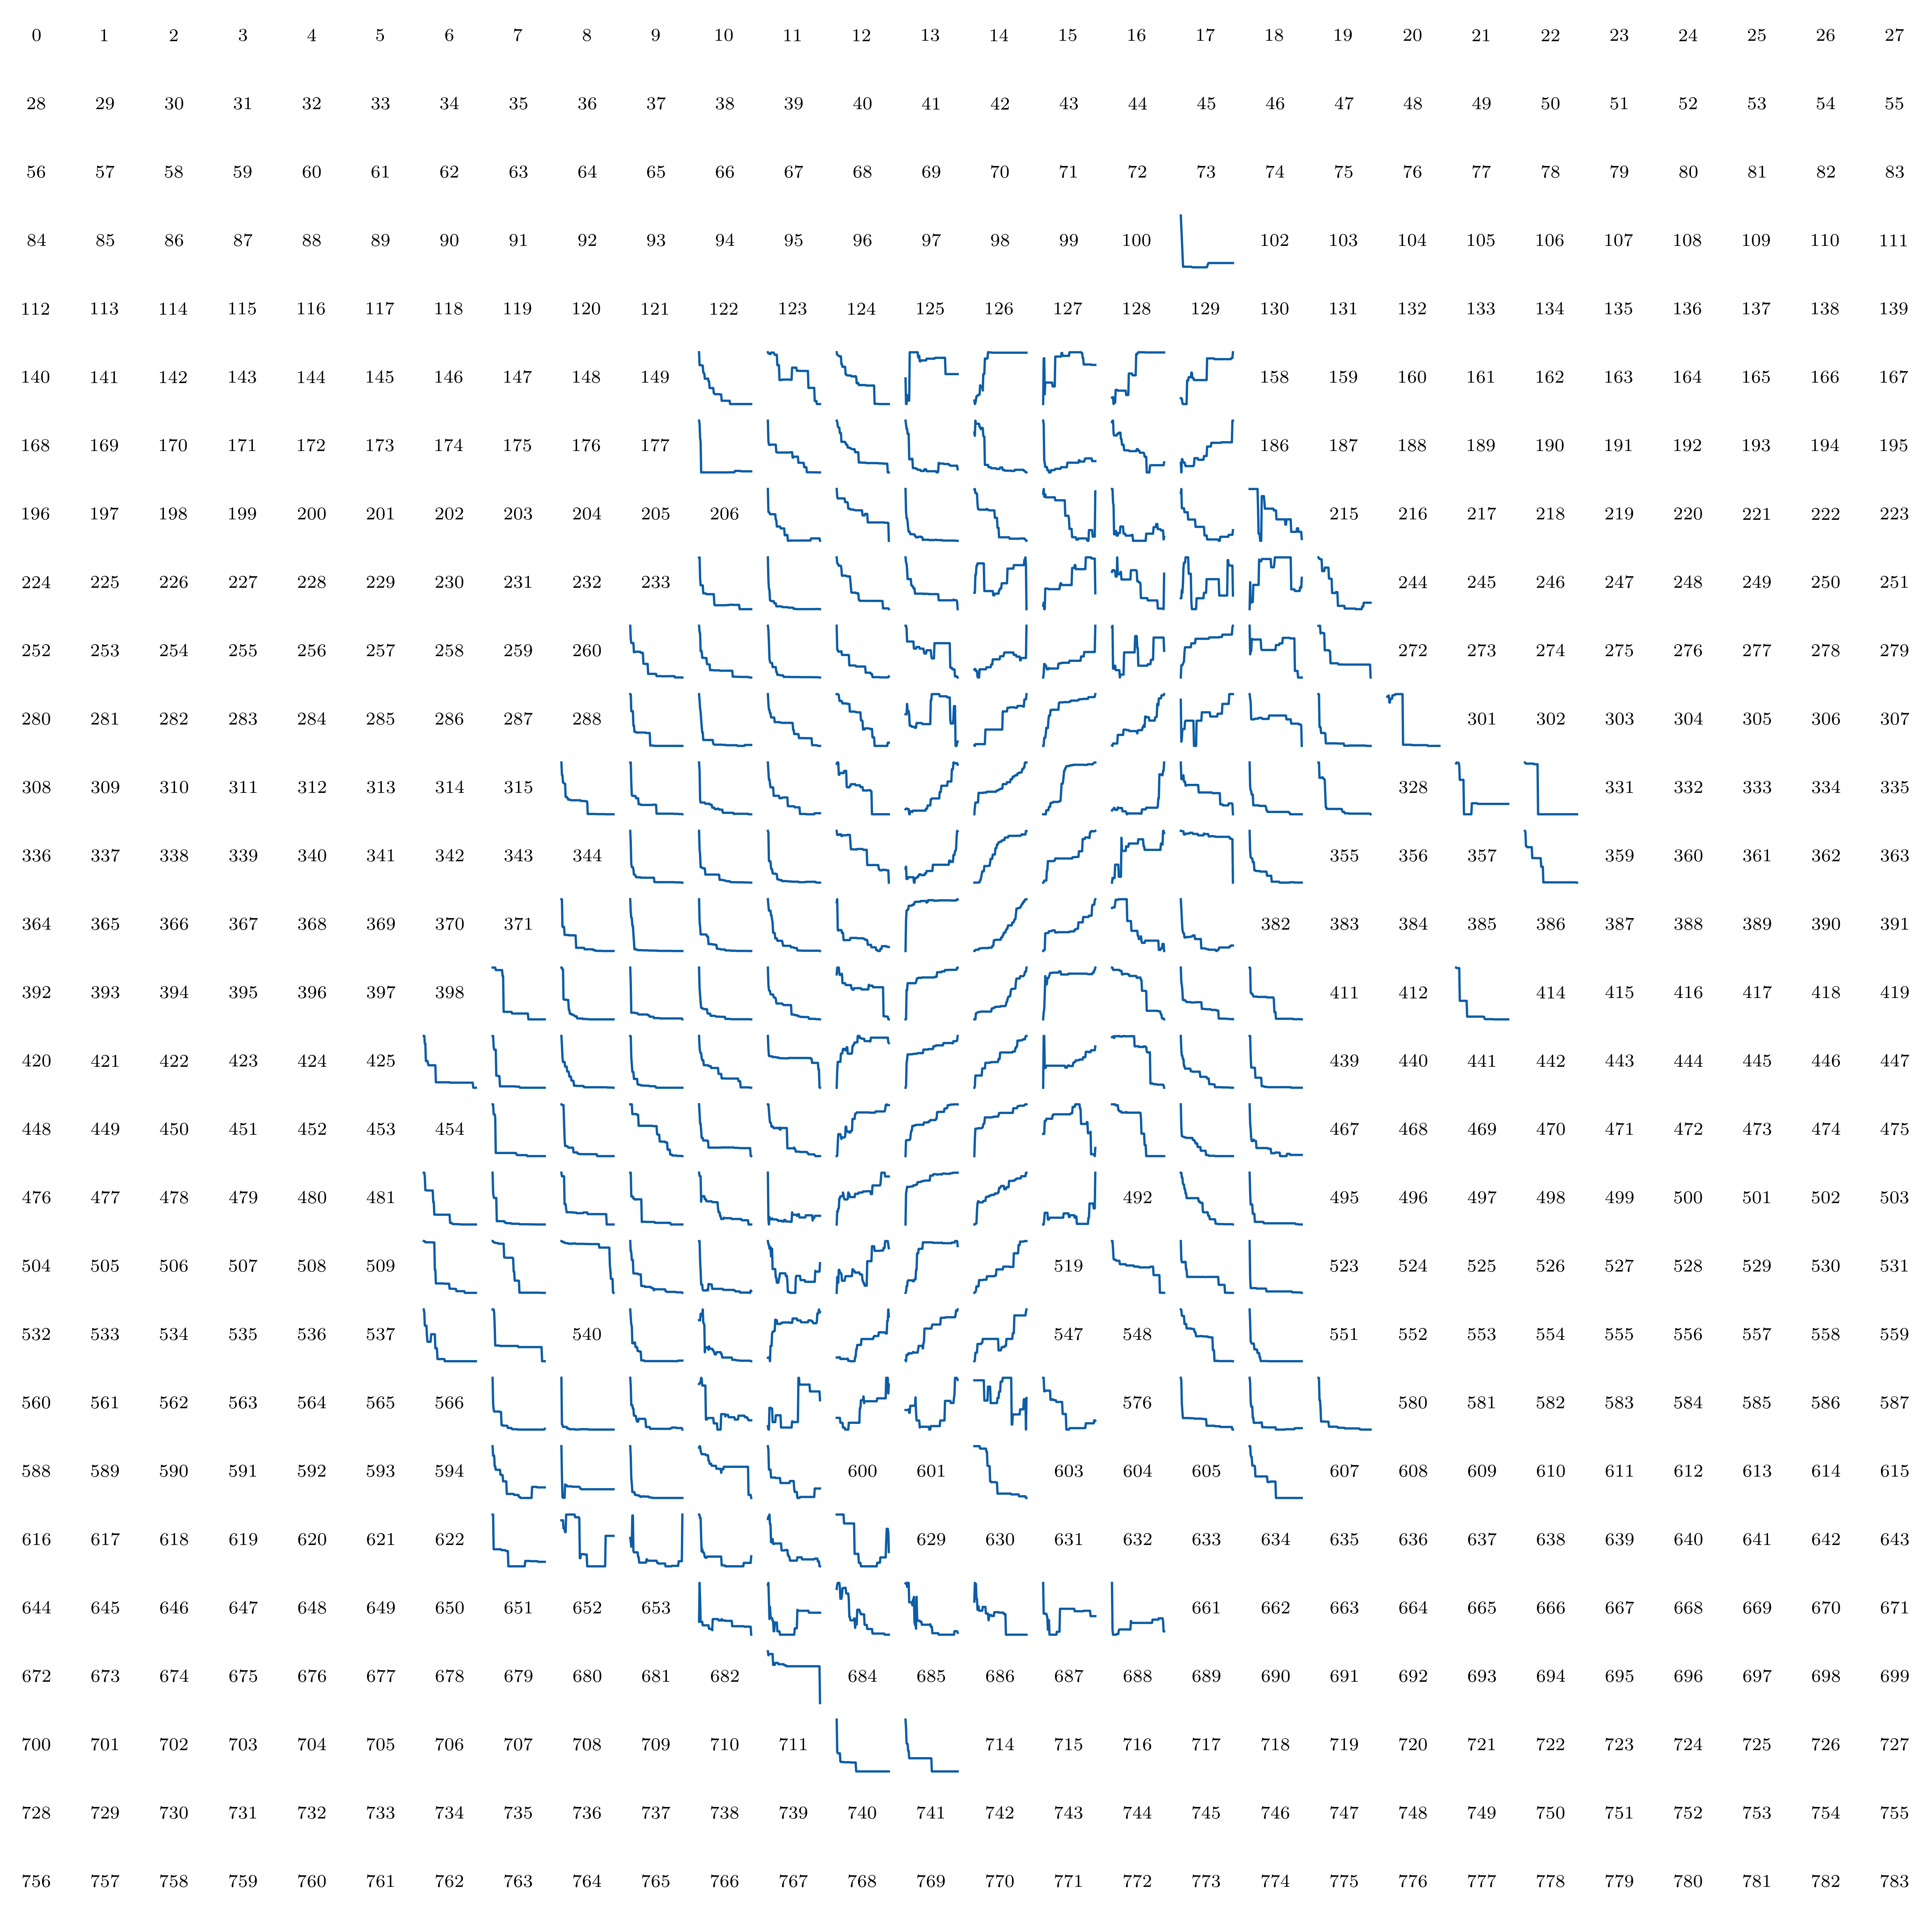

In [27]:
display(my_plot)